In [1]:
# To solve the isuue of overfitting and underfitting we use Regularization techniques.

<img src='fitting.png' width=500>

In [2]:
# Dropout Regularization is one of the techniques used in Deep Learning to tackle Overfitting of the training data.

In [3]:
# If you are using a deep neural network (i.e., having too many hidden layers) or may be you are having so many epochs,
# your neural network tends to overfit the model and now it cannot perform well on test dataset as now it cannot generalize well

To tackle with the overfitting problem you can drop some of the neurons. The number of neurons dropped can be random and from different hidden layers.<br><img src='drop.jpg' width=500><br>
In this image, the neurons in pink are being dropped from the network. You can also observe that from each hidden layer we have dropped 50% of the neurons. There is a factor in dropout regularization where you specify the percent of neurons to be dropped. In this case, it would be 0.5 (i.e., 50%).<br>
Now that you've dropped some of your neurons, you do the first forward pass and calculate the error. When it comes to the second forward pass, you again randomly remove some of the neurons from the original structure and perform the second forward pass. You repeat the same process.<br><img src='drop2.jpg' width=500><br>

In [4]:
# Note that the dropout rate (2nd sample) is still the same as that of the first sample.
# You can also change the dropout rate for the second layer in contrary to the first layer.
# For example, you can have dropout rate for the first layer to be 50% and that of the second layer to be 25%

<img src='a.jpg' width=500><br>
1. Since you've dropped few of your neurons, now your model cannot rely totally on the neurons. This is because you are dropping your neurons at random and hence backtracking occurs on different parameters. Also now your ***model isn't biased to the prominent features.*** This is because there are chances that the neurons affecting the prominent features are dropped.<br>
2. Neurons will also not learn redundant details of the input.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [6]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('sonar_dataset.csv',header=None) # Since, we do not have a header in this csv file, we inititalize header to none
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
133,0.0790,0.0707,0.0352,0.1660,0.1330,0.0226,0.0771,0.2678,0.5664,0.6609,...,0.0298,0.0390,0.0294,0.0175,0.0249,0.0141,0.0073,0.0025,0.0101,M
102,0.0587,0.1210,0.1268,0.1498,0.1436,0.0561,0.0832,0.0672,0.1372,0.2352,...,0.0331,0.0111,0.0088,0.0158,0.0122,0.0038,0.0101,0.0228,0.0124,M
44,0.0257,0.0447,0.0388,0.0239,0.1315,0.1323,0.1608,0.2145,0.0847,0.0561,...,0.0096,0.0153,0.0096,0.0131,0.0198,0.0025,0.0199,0.0255,0.0180,R
152,0.0131,0.0201,0.0045,0.0217,0.0230,0.0481,0.0742,0.0333,0.1369,0.2079,...,0.0168,0.0086,0.0045,0.0062,0.0065,0.0030,0.0066,0.0029,0.0053,M
175,0.0294,0.0123,0.0117,0.0113,0.0497,0.0998,0.1326,0.1117,0.2984,0.3473,...,0.0056,0.0104,0.0079,0.0014,0.0054,0.0015,0.0006,0.0081,0.0043,M


In [7]:
# Here, R ==> Rock and M ==> Mine

In [8]:
df.shape

(208, 61)

In [9]:
df.isnull().sum().sum()

0

In [10]:
# We don't have any null values.

In [11]:
# Lets count the number of classes in the output;
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [12]:
# You can see that our dataset is not likely to be imbalanced.

In [13]:
# Lets split our dataset into X and y;
X=df.drop(columns=60)
y=df[60]
print(f'shape: X ==> {X.shape}  y ==> {y.shape}')

shape: X ==> (208, 60)  y ==> (208,)


In [14]:
# We need to convert the y series into one hot encoded series.
y=pd.get_dummies(y,drop_first=True)

In [15]:
y.sample(5)

,R
116,0
169,0
59,1
67,1
104,0


In [16]:
y.value_counts()

R
0    111
1     97
dtype: int64

In [17]:
# You can also change the dtypes of the dataset in order to save memory. For example: int64 can be converted into uint8 
# and float64 into float32.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [18]:
X=X.astype('float32')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float32
 1   1       208 non-null    float32
 2   2       208 non-null    float32
 3   3       208 non-null    float32
 4   4       208 non-null    float32
 5   5       208 non-null    float32
 6   6       208 non-null    float32
 7   7       208 non-null    float32
 8   8       208 non-null    float32
 9   9       208 non-null    float32
 10  10      208 non-null    float32
 11  11      208 non-null    float32
 12  12      208 non-null    float32
 13  13      208 non-null    float32
 14  14      208 non-null    float32
 15  15      208 non-null    float32
 16  16      208 non-null    float32
 17  17      208 non-null    float32
 18  18      208 non-null    float32
 19  19      208 non-null    float32
 20  20      208 non-null    float32
 21  21      208 non-null    float32
 22  22

In [19]:
# You can see that memory usage has been reduced to 50%. Similarly we check for the y series
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   R       208 non-null    uint8
dtypes: uint8(1)
memory usage: 336.0 bytes


In [20]:
# It is already in its lowest dtype

In [21]:
# There was no need of reducing the space in this dataset as the memory was only about 100 KB. But there are cases where
# the memory usage will be about 100 MB and more and hence reducing the memory usage is a good idea.

In [22]:
# Now we divide the dataset into train and test dataset.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=1)

In [25]:
model=keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'), # We can use input_dim instead of input_shape=(n,). Input to hidden
    keras.layers.Dense(30,activation='relu'), # Hidden to Hidden
    keras.layers.Dense(15,activation='relu'), # Hidden to Hidden
    keras.layers.Dense(1,activation='sigmoid') # Hidden to Output
])
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size=8) # We specified batch_size because we are performing kind off mini batch gradient descent

Train on 156 samples
Epoch 1/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.6902 - accuracy: 0.4872
Epoch 2/100
156/156 [==============================] - 0s 352us/sample - loss: 0.6715 - accuracy: 0.5705
Epoch 3/100
156/156 [==============================] - 0s 358us/sample - loss: 0.6503 - accuracy: 0.6410
Epoch 4/100
156/156 [==============================] - 0s 364us/sample - loss: 0.6140 - accuracy: 0.7436
Epoch 5/100
156/156 [==============================] - 0s 377us/sample - loss: 0.5883 - accuracy: 0.6987
Epoch 6/100
156/156 [==============================] - 0s 350us/sample - loss: 0.5664 - accuracy: 0.7051
Epoch 7/100
156/156 [==============================] - 0s 356us/sample - loss: 0.5490 - accuracy: 0.7692
Epoch 8/100
156/156 [==============================] - 0s 384us/sample - loss: 0.5158 - accuracy: 0.7821
Epoch 9/100
156/156 [==============================] - 0s 377us/sample - loss: 0.4736 - accuracy: 0.7885
Epoch 10/100
156/156 [==============

In [26]:
# You can see that our model is overfit, lets calculate the score
model.evaluate(X_test, y_test)

52/52 [==============================] - 0s 424us/sample - loss: 0.9161 - accuracy: 0.7500


[0.9160669766939603, 0.75]

In [27]:
# You can see that our model is only 77% accurate.

In [28]:
# Lets predict the values
y_pred=model.predict(X_test)
y_pred.shape

(52, 1)

In [29]:
y_pred=y_pred.reshape(52)

In [30]:
y_pred=y_pred.round() # Since sigmoid gives output b/w 0 and 1, we round the values to get the answer (i.e., > 0.5==1 else 0)

In [31]:
y_pred

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.], dtype=float32)

In [32]:
np.array(y_test).reshape(52)

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0], dtype=uint8)

In [33]:
# Lets also print the classification report
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.80      0.64      0.71        25

    accuracy                           0.75        52
   macro avg       0.76      0.75      0.75        52
weighted avg       0.76      0.75      0.75        52



Text(33.0, 0.5, 'Y_true')

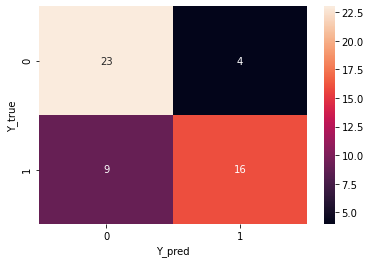

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Y_pred')
plt.ylabel('Y_true')

In [36]:
# Lets use Dropout regularization to remove overfitting issue. This can be done by introducing dropout layers in between 
# the hidden layers. The general practice is also to introduce the dropout layers in between the hidden layers.

In [44]:
modeld=keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'), # We can use input_dim instead of input_shape=(n,). Input to hidden
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'), # Hidden to Hidden
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'), # Hidden to Hidden
    keras.layers.Dropout(0.5),                # You can also change the dropout rate for each layer.
    keras.layers.Dense(1,activation='sigmoid') # Hidden to Output
])
modeld.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
modeld.fit(X_train,y_train, epochs=100, batch_size=8) # We specified batch_size because we are performing kind off mini batch gradient descent

Train on 156 samples
Epoch 1/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.7396 - accuracy: 0.4679
Epoch 2/100
156/156 [==============================] - 0s 307us/sample - loss: 0.7141 - accuracy: 0.4808
Epoch 3/100
156/156 [==============================] - 0s 319us/sample - loss: 0.7131 - accuracy: 0.5513
Epoch 4/100
156/156 [==============================] - 0s 332us/sample - loss: 0.7142 - accuracy: 0.5128
Epoch 5/100
156/156 [==============================] - 0s 307us/sample - loss: 0.7350 - accuracy: 0.4295
Epoch 6/100
156/156 [==============================] - 0s 313us/sample - loss: 0.6753 - accuracy: 0.5449
Epoch 7/100
156/156 [==============================] - 0s 322us/sample - loss: 0.7044 - accuracy: 0.5256
Epoch 8/100
156/156 [==============================] - 0s 322us/sample - loss: 0.7073 - accuracy: 0.5064
Epoch 9/100
156/156 [==============================] - 0s 375us/sample - loss: 0.6982 - accuracy: 0.5577
Epoch 10/100
156/156 [==============

In [45]:
modeld.evaluate(X_test,y_test)

52/52 [==============================] - 0s 866us/sample - loss: 0.4307 - accuracy: 0.7885


[0.43074912749803984, 0.78846157]

In [39]:
# You can see that our accuracy has been increased and also now our model is not overfit.

In [46]:
y_predd=modeld.predict(X_test)

In [50]:
y_predd=y_predd.reshape(52)
y_predd=y_predd.round()
y_predd

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0.], dtype=float32)

In [52]:
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.82      0.72      0.77        25

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52



In [53]:
# You can see the improvement of the f1-score in this case. Dropout Regularization does not guarantee you that the model
# is improved but your model is likely to be improved. This is because of the random dropping of the neurons.

In [ ]:
# Dropout regularization is used in the case of computer vision or related problems where your neural networks are quite dense.